In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("../../dataset")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [5]:
df.popularity.hist()

AttributeError: 'DataFrame' object has no attribute 'popularity'

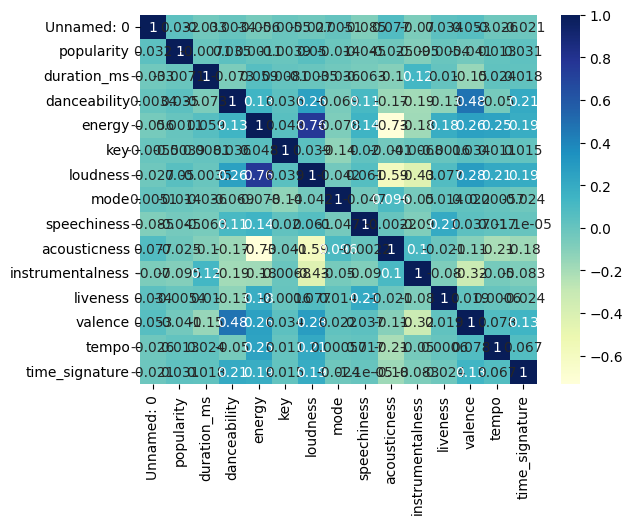

In [ ]:
corr = df.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",
plt.show()

In [ ]:
# pairplot with hue 
sb.pairplot(df, hue="popularity")
# to show
plt.show()

KeyboardInterrupt: 

In [ ]:
categorical = df.select_dtypes(exclude = np.number).columns
categorical

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
df1 = df.copy()
classes = dict()
le = LabelEncoder()
for col in categorical:
    df1[col]= le.fit_transform(df1[col])
    classes[col] = le.classes_

In [ ]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
X = df1.drop(columns = 'charges').values
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [ ]:
y = df1['charges'].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.shape

(402, 6)

In [ ]:
reg = LinearRegression() # ols
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred[:10]

array([ 8931.42116433,  7070.90670308, 36937.08049605,  9596.99214428,
       27008.35487143, 10866.48485361,    37.46102168, 17222.80920435,
         918.30811536, 11396.55374009])

In [ ]:
y_test[:10]

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [ ]:
np.mean(np.square(y_test - y_pred))

33805466.89868861

In [ ]:
np.mean(np.absolute(y_test - y_pred))

4155.23984305938

In [ ]:
min(y), max(y)

(1121.8739, 63770.42801)

In [ ]:
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
RSS = np.sum(np.square(y_test - y_pred))
1- RSS/ TSS

0.7694415927057693

In [ ]:
np.mean(np.abs(y_pred-y_test))

4155.23984305938

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)


(0.7694415927057693, 33805466.89868861, 4155.23984305938)

In [ ]:
y_bar = np.mean(y_test)
1 - np.sum(np.square(y_pred-y_test))/np.sum(np.square(y_test-y_bar))

0.7694415927057693